<a href="https://colab.research.google.com/github/bchaoss/Numerical-Optimization/blob/main/Code/03Newtow_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Newton's Method

The purpose of this notebook is to show that Newton's method is affected by different choices of initial points, with three cases of reaching a minima, reaching a saddle point, and a matrix singularity that prevents the continuation of the iteration, respectively.

Consider the following problem:

$$min{f(x)} = 3 x_1^2 + 3 x_2^2 - x_1^2 x_2$$

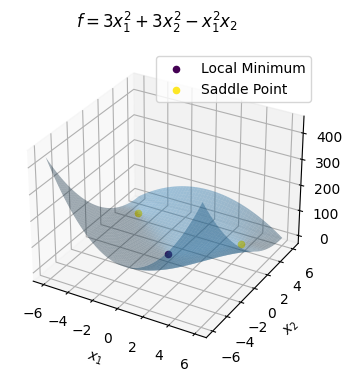

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def f(x1, x2):
    return 3 * x1**2 + +3 * x2**2 - (x1**2) * x2

x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)

# Plot surface
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X1, X2, f(X1,X2), alpha=0.4)

# Local minimum point
local_min = np.array([0, 0, f(0, 0)])
ax.scatter(*local_min, marker='o', color=surface.get_cmap()(surface.norm(local_min[2])-1000), label='Local Minimum')

# Saddle point
saddle_point1 = np.array([3*np.sqrt(2), 3, f(3*np.sqrt(2), 3)])
saddle_point2 = np.array([-3*np.sqrt(2), 3, f(-3*np.sqrt(2), 3)])
ax.scatter(*saddle_point1, marker='o', color=surface.get_cmap()(surface.norm(saddle_point1[2])+80), label='Saddle Point')
ax.scatter(*saddle_point2, marker='o', color=surface.get_cmap()(surface.norm(saddle_point2[2])+80))

ax.legend()
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
plt.suptitle(r'$f = 3 x_1^2 + 3 x_2^2 - x_1^2 x_2$')
plt.show()

The first and second order derivatives (gradient, Hessian matrix) of $f(x)$ can be found analytically:

$$g(x) = (6 x_1 - 2x_1 x_2, 6 x_1 - x_2^2)^T,$$

$$G(x) = \begin{bmatrix}
      6 - 2x_2 & -2 x_1 \\
      -2 x_1 & 6 \\
      \end{bmatrix}.
$$

In [2]:
def grad_f(x):
    return np.array([6*x[0]-2*x[0]*x[1], 6*x[1]-x[0]**2])

def Hessian(x):
    return np.array([[6-2*x[1], -2*x[0]], [-2*x[0], 6]])

In [3]:
# The Newton method
def Newton_method(grad_f, Hessian, x0, iterMax=100):
    """
    Perform Newton's method to find the minimum of a function.

    Parameters:
        grad_f (function): The gradient of the objective function.
        Hessian (function): The Hessian matrix (second derivative matrix) of the objective function.
        x0 (array-like): The initial point for the optimization.
        iterMax (int, optional): The maximum number of iterations. Defaults to 100.

    Return:
        path (list): The sequence of iterates during the optimization process.
    """
    x = x0
    a = 1 # fixed step length
    path = []
    print("The iteration process:")
    for iter in range(iterMax):
        g = grad_f(x)
        h = Hessian(x)
        print(f"Iteration {iter}: {x}, |g|={np.linalg.norm(g, ord=np.inf)}")
        path.append(x)
        if np.linalg.norm(g, ord=np.inf) < eps:
            break
        d = -np.dot(np.linalg.inv(h), g)
        x = x + a * d

    print(f"The result is ({x[0]}, {x[1]})")
    return path

eps = 1e-6

Calculated from three initial points respectively, (1.5,1.5), (-2,4), (0,3).

In [4]:
# initial point 1: (1.5, 1.5) -> Minimum point
path1 = Newton_method(grad_f, Hessian, x0 = np.array([1.5, 1.5]))

The iteration process:
Iteration 0: [1.5 1.5], |g|=6.75
Iteration 1: [-3.75 -2.25], |g|=39.375
Iteration 2: [ 0.625 -3.125], |g|=19.140624999999915
Iteration 3: [0.31901607 0.00135752], |g|=1.9132302995411783
Iteration 4: [-0.00197124 -0.0171715 ], |g|=0.1030328568314055
Iteration 5: [-1.12184284e-05 -6.40261553e-07], |g|=6.731058498807207e-05
Iteration 6: [-2.39416386e-12 -2.09755138e-11], |g|=1.2585308288120692e-10
The result is (-2.394163855137647e-12, -2.097551381353353e-11)


In [5]:
# initial point 2: (-2, 4) -> Saddle point
path2 = Newton_method(grad_f, Hessian, x0 = np.array([-2, 4]))

The iteration process:
Iteration 0: [-2  4], |g|=20.0
Iteration 1: [-4.  2.], |g|=7.999999999999998
Iteration 2: [-4.30769231  3.07692308], |g|=0.6627218934911241
Iteration 3: [-4.24392489  3.0011387 ], |g|=0.009665146942126057
Iteration 4: [-4.24264112  3.00000034], |g|=2.9227811353393918e-06
Iteration 5: [-4.24264069  3.        ], |g|=3.019806626980426e-13
The result is (-4.242640687119334, 3.0000000000000355)


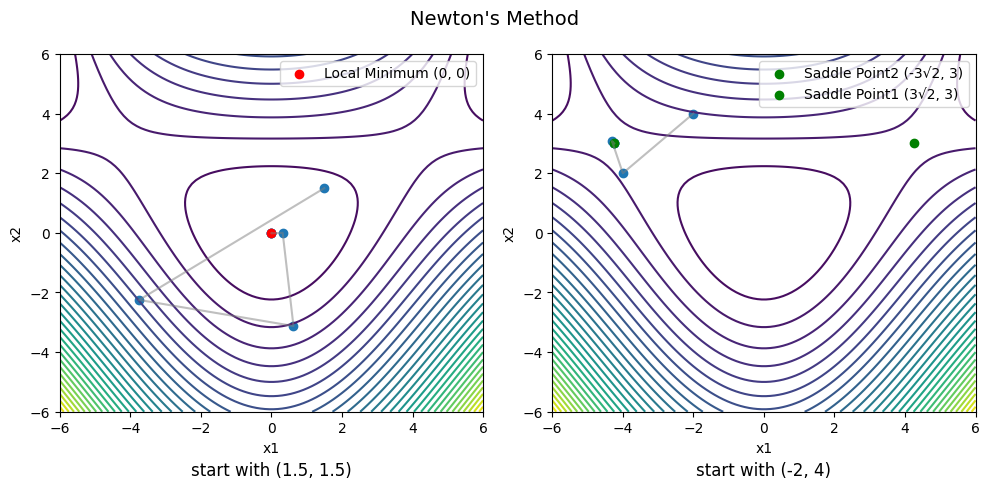

In [6]:
# Visualization of points 1 & 2
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.contour(X1, X2, f(X1, X2), levels=30)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax2.contour(X1, X2, f(X1, X2), levels=30)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')


ax1.scatter(*zip(*path1), marker='o')
ax1.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)
ax1.scatter(0, 0, marker='o', color='red', label='Local Minimum (0, 0)')
ax1.legend()
ax1.set_title('start with (1.5, 1.5)', y=-0.2)

ax2.scatter(*zip(*path2), marker='o')
ax2.plot(*zip(*path2), linestyle='-', color='gray', alpha=0.5)
ax2.scatter(-3*np.sqrt(2), 3, marker='o', color='green', label='Saddle Point2 (-3√2, 3)')
ax2.scatter(3*np.sqrt(2), 3, marker='o', color='green', label='Saddle Point1 (3√2, 3)')
ax2.legend()
ax2.set_title('start with (-2, 4)', y=-0.2)

fig.suptitle("Newton's Method", fontsize=14)
plt.tight_layout()
plt.show()

BUT for initial point (0, 3), Newton's method fails.

In [7]:
# initial point 2: (-2, 4) -> H(x0) is Singular Matrix, then Newton's method failed.
path3 = Newton_method(grad_f, Hessian, x0 = np.array([0, 3]))

The iteration process:
Iteration 0: [0 3], |g|=18.0


LinAlgError: ignored

The above cell will raise a ERROR:
> LinAlgError: Singular matrix